<a href="https://colab.research.google.com/github/LanitaMG/py_Evaluacion/blob/main/NBA_Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importación de librerías
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd

Estadísticas NBA - Season 2021-2022

Datos
Fuente: https://www.basketball-reference.com

In [ ]:
#Creación del data frame a partir de un csv
nba_stats_original = pd.read_csv('NBA_2021-2022.csv', decimal=",")

In [ ]:
#Descripción de los datos
nba_stats_original.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,...,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,304.501232,26.051724,36.705665,16.672414,18.264655,2.869828,6.386330,0.426235,0.871305,2.560591,...,0.658267,0.812808,2.519704,3.331527,1.808251,0.582759,0.353448,0.978695,1.564532,7.812192
std,172.637333,4.059640,25.898042,23.817195,9.649056,2.224084,4.651322,0.148525,0.841935,2.205642,...,0.283491,0.744173,1.790751,2.352880,1.838080,0.425452,0.360744,0.817941,0.826830,6.138266
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,158.750000,23.000000,12.000000,0.000000,10.500000,1.200000,3.000000,0.380750,0.200000,0.800000,...,0.600000,0.300000,1.300000,1.700000,0.500000,0.300000,0.100000,0.400000,1.000000,3.300000
50%,300.500000,25.000000,36.500000,4.000000,17.500000,2.400000,5.150000,0.439500,0.700000,2.050000,...,0.750000,0.600000,2.300000,2.900000,1.200000,0.500000,0.300000,0.800000,1.600000,6.300000
75%,459.000000,29.000000,61.000000,25.000000,25.725000,3.900000,8.725000,0.500000,1.400000,3.900000,...,0.838000,1.100000,3.400000,4.400000,2.400000,0.900000,0.500000,1.300000,2.200000,10.600000
max,605.000000,41.000000,82.000000,82.000000,43.500000,11.400000,21.800000,1.000000,4.500000,11.700000,...,1.000000,4.600000,11.000000,14.700000,10.800000,2.500000,2.800000,4.800000,5.000000,30.600000


In [ ]:
#Lista de columnas
nba_stats_original.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', '0-3f%', '3-10f%', '10-16f%',
       '16f-3P%', 'Dunks%', 'Dunks', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

array(['TOR', 'MEM', 'MIA', 'BRK', 'UTA', 'TOT', 'NOP', 'MIL', 'CLE',
       'IND', 'LAL', 'ORL', 'NYK', 'HOU', 'WAS', 'PHO', 'SAC', 'DET',
       'CHO', 'CHI', 'ATL', 'DEN', 'PHI', 'SAS', 'LAC', 'OKC', 'MIN',
       'DAL', 'GSW', 'POR', 'BOS'], dtype=object)

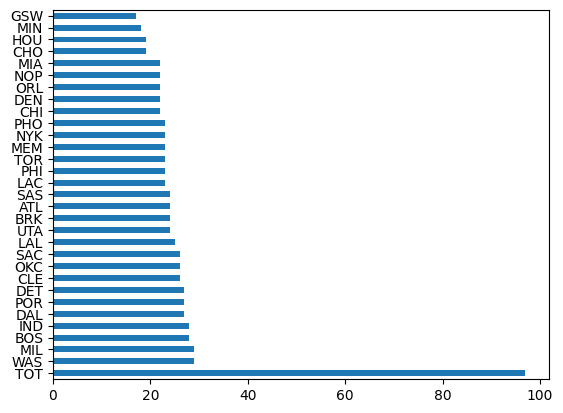

In [ ]:
#Verificación de los valores de la columna Tm (Team)
nba_stats_original['Tm'].value_counts().plot(kind='barh')
nba_stats_original['Tm'].unique()

In [ ]:
# Eliminar equipo TOT (representa el total de la estadística de aquellos jugadores que pasaron por más de un equipo)
# Mantener solamente las columnas relevantes
nba_stats = nba_stats_original.loc[nba_stats_original["Tm"] != 'TOT'].filter(['Rk', 'Pos', 'Tm', '3P', '3P%', '2P', '2P%', '0-3f%', '3-10f%', '10-16f%','16f-3P%', 'Dunks', 'FT', 'FT%', 'TRB','AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'])


Posiciones

    ¿Cuáles son las posiciones de juego en el baloncesto?
PG	BASE (Point Guard, Playmaker)
SG	ESCOLTA (Alero Bajo, Shooting Guard)
SF	ALERO (Alero Alto, Small Forward)
PF	ALA-PIVOT (Power Forward)
C	PIVOT (Center)

<AxesSubplot: title={'center': 'Puntos por posición'}, ylabel='Pos'>

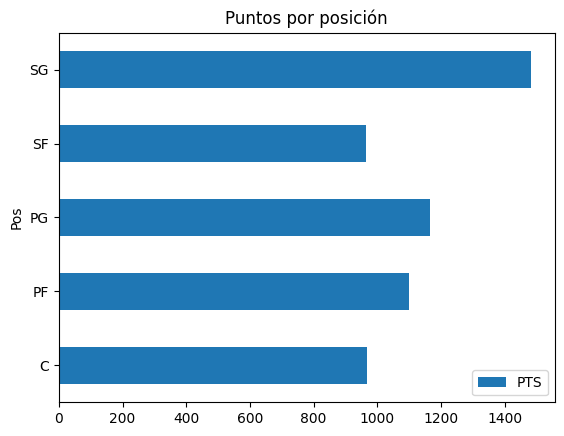

In [ ]:
# Total de puntos por posición (la tabla suministra el promedio de puntos por partido por jugador)
nba_stats.groupby('Pos')['PTS'].sum().plot(kind='barh', legend='Reverse', title='Puntos por posición');


<AxesSubplot: title={'center': 'Asistencias por posición'}, ylabel='Pos'>

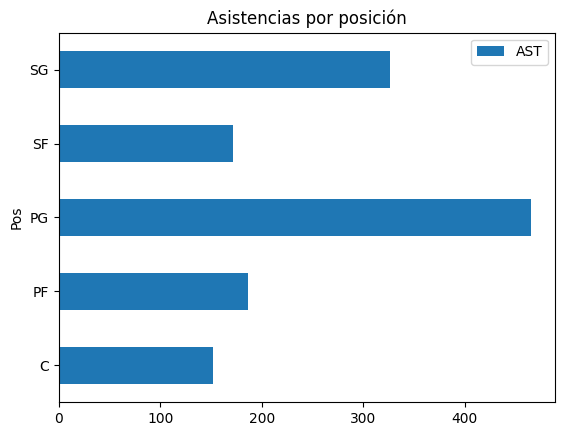

In [ ]:
# Total de asistencias por posición (la tabla suministra el promedio de asistencias por partido por jugador)
nba_stats.groupby('Pos')['AST'].sum().plot(kind='barh', legend='Reverse', title='Asistencias por posición');


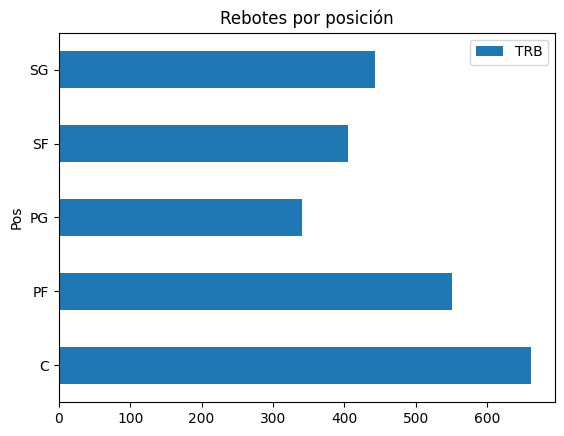

In [ ]:
# Total de rebotes por posición (la tabla suministra el promedio de rebotes por partido por jugador)
nba_stats.groupby('Pos')['TRB'].sum().plot(
    kind='barh', legend='Reverse', title='Rebotes por posición');


<AxesSubplot: title={'center': 'Bloqueos por posición'}, ylabel='Pos'>

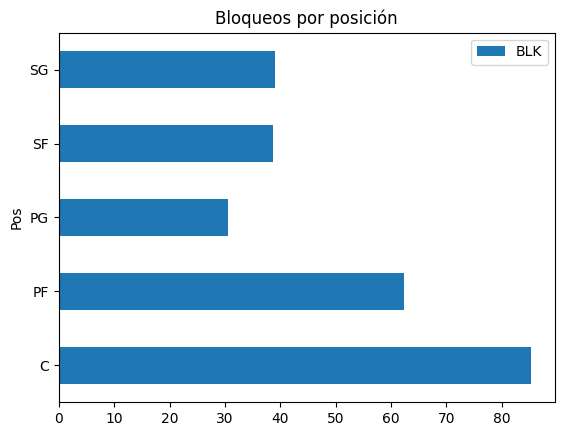

In [ ]:
# Total de bloqueos por posición (la tabla suministra el promedio de bloqueos por partido por jugador)
nba_stats.groupby('Pos')['BLK'].sum().plot(
    kind='barh', legend='Reverse', title='Bloqueos por posición')


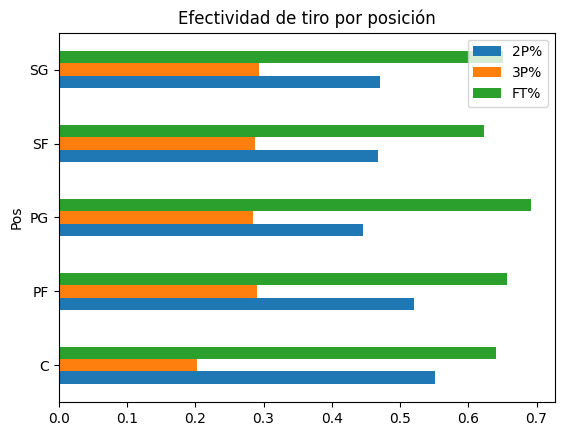

In [ ]:
# Efectividad de tipo por posición: tiros libres (FT), dobles (2P) y triples (3P)
nba_stats.groupby('Pos').mean().filter(['2P%','3P%', 'FT%']).plot(
    kind='barh', title='Efectividad de tiro por posición');


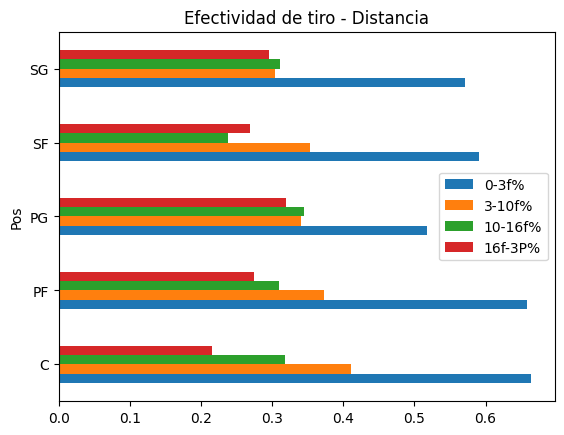

In [ ]:
# Efectividad de tipo por posición: distancia al aro 
nba_stats.groupby('Pos').mean().filter(['0-3f%', '3-10f%', '10-16f%','16f-3P%']).plot(kind='barh', title='Efectividad de tiro - Distancia');


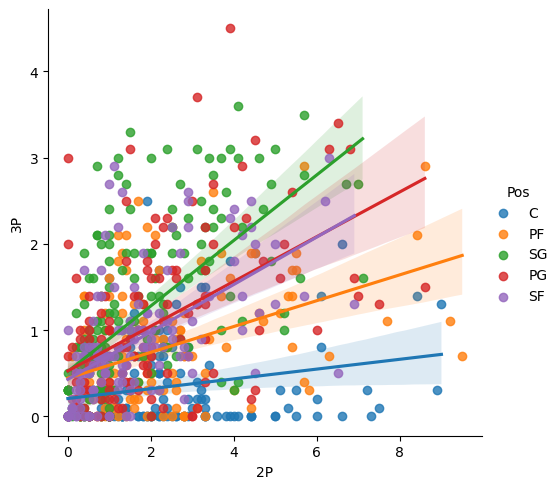

In [ ]:
# Cantidad de puntos dobles y triples anotados por posición
sns.lmplot(x='2P', y='3P', data=nba_stats, hue='Pos');


<AxesSubplot: xlabel='Pos', ylabel='PTS'>

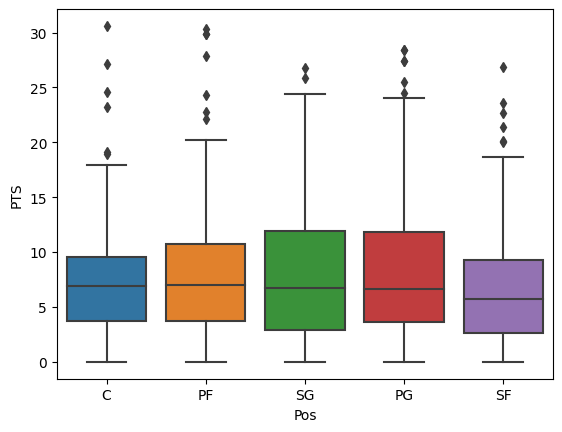

In [ ]:
# Distribución de puntos por posición
sns.boxplot(x="Pos", y="PTS", data=nba_stats)


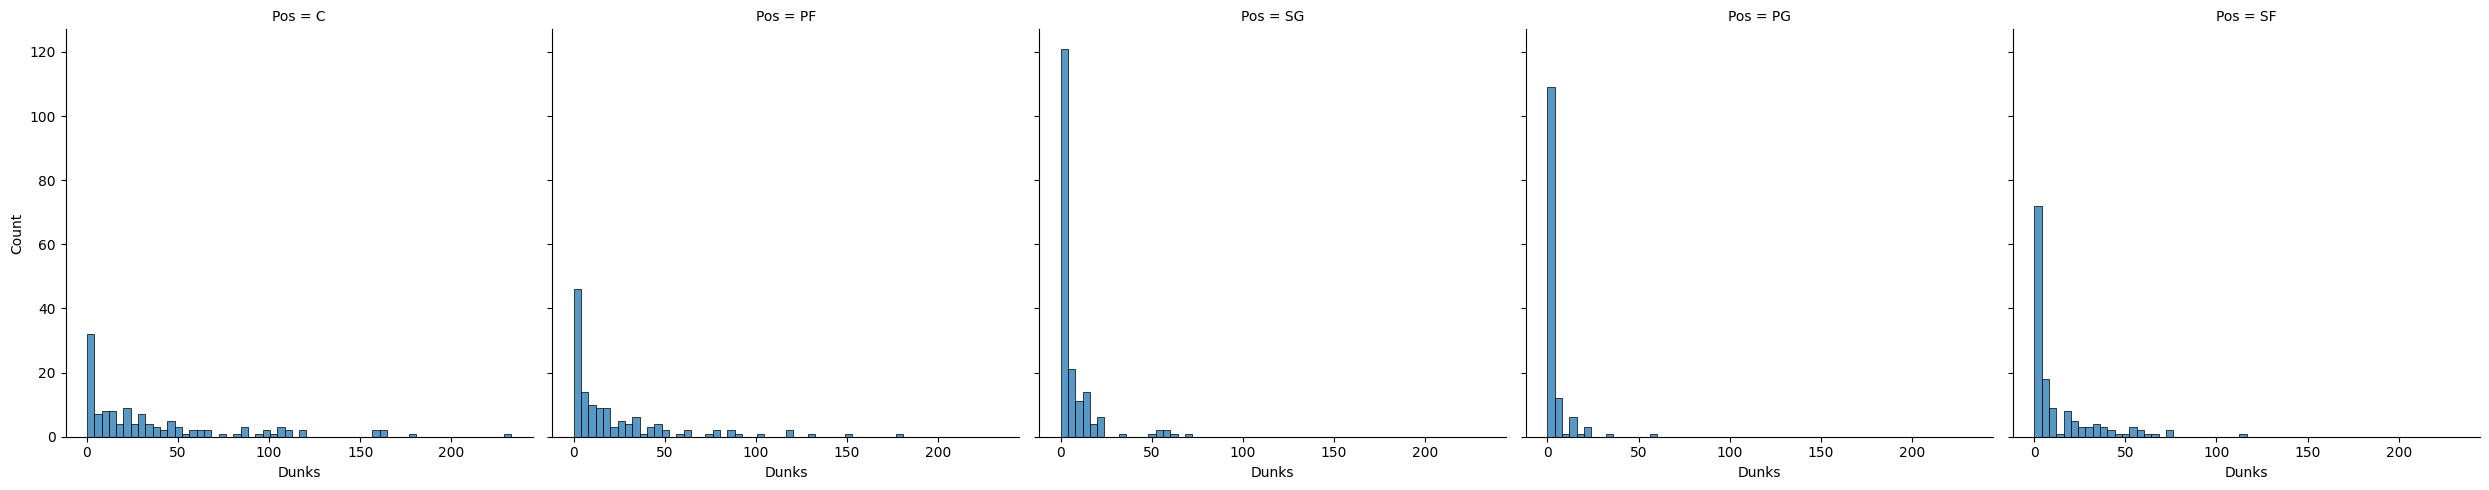

In [ ]:
# Cantidad de volcadas por posición
sns.displot(nba_stats, x='Dunks', col="Pos")


In [ ]:
#Cargar dataframe Arenas
arenas = pd.read_csv('NBA_Arenas.csv')
arenas

,Team,Tm,Arena,Long,Lat,geometry
0,Atlanta Hawks,ATL,State Farm Arena,33.757° N,84.396° W,POINT (33.757 -84.396)
1,Boston Celtics,BOS,TD Garden,42.366° N,71.062° W,POINT (42.366 -71.062)
2,Brooklyn Nets,BRK,Barclays Center,40.683° N,73.975° W,POINT (40.683 -73.975)
3,Charlotte Hornets,CHO,Spectrum Center,35.225° N,80.839° W,POINT (35.225 -80.839)
4,Chicago Bulls,CHI,United Center,41.881° N,87.675° W,POINT (41.881 -87.675)
5,Cleveland Cavaliers,CLE,Quicken Loans Arena,41.497° N,81.688° W,POINT (41.497 -81.688)
6,Dallas Mavericks,DAL,American Airlines Center,32.791° N,96.81° W,POINT (32.791 -96.81)
7,Denver Nuggets,DEN,Pepsi Center,39.749° N,105.008° W,POINT (39.749 -105.008)
8,Detroit Pistons,DET,Little Caesars Arena,42.341° N,83.055° W,POINT (42.341 -83.055)
9,Golden State Warriors,GSW,Chase Center,37.768° N,122.388° W,POINT (37.768 -122.388)


In [ ]:
# Generar tabla con estadísticas por equipos
equipos = nba_stats.groupby('Tm').sum().filter(['Tm','2P', '3P', 'PTS', 'AST'])
equipos

,2P,3P,PTS,AST
Tm,,,,
ATL,48.0,22.3,191.8,37.7
BOS,42.6,20.9,175.1,37.1
BRK,60.3,24.0,224.6,51.6
CHI,46.1,17.0,169.2,35.7
CHO,40.9,17.8,158.5,38.0
CLE,55.1,19.2,200.3,49.5
DAL,45.4,21.4,185.7,43.2
DEN,42.4,19.6,167.1,40.3
DET,52.5,22.7,206.5,49.5


In [ ]:
#Unir equipos con arenas
equipos2 = pd.merge(equipos, arenas, on='Tm')
equipos2

,Tm,2P,3P,PTS,AST,Team,Arena,Long,Lat,geometry
0,ATL,48.0,22.3,191.8,37.7,Atlanta Hawks,State Farm Arena,33.757° N,84.396° W,POINT (33.757 -84.396)
1,BOS,42.6,20.9,175.1,37.1,Boston Celtics,TD Garden,42.366° N,71.062° W,POINT (42.366 -71.062)
2,BRK,60.3,24.0,224.6,51.6,Brooklyn Nets,Barclays Center,40.683° N,73.975° W,POINT (40.683 -73.975)
3,CHI,46.1,17.0,169.2,35.7,Chicago Bulls,United Center,41.881° N,87.675° W,POINT (41.881 -87.675)
4,CHO,40.9,17.8,158.5,38.0,Charlotte Hornets,Spectrum Center,35.225° N,80.839° W,POINT (35.225 -80.839)
5,CLE,55.1,19.2,200.3,49.5,Cleveland Cavaliers,Quicken Loans Arena,41.497° N,81.688° W,POINT (41.497 -81.688)
6,DAL,45.4,21.4,185.7,43.2,Dallas Mavericks,American Airlines Center,32.791° N,96.81° W,POINT (32.791 -96.81)
7,DEN,42.4,19.6,167.1,40.3,Denver Nuggets,Pepsi Center,39.749° N,105.008° W,POINT (39.749 -105.008)
8,DET,52.5,22.7,206.5,49.5,Detroit Pistons,Little Caesars Arena,42.341° N,83.055° W,POINT (42.341 -83.055)
9,GSW,36.0,20.1,151.9,39.8,Golden State Warriors,Chase Center,37.768° N,122.388° W,POINT (37.768 -122.388)


In [ ]:
# Reasignando Odometer
#car_sales["Odometer (KM)"] = car_sales["Odometer (KM)"].apply(lambda x: x / 1.6)
equipos2['Long'] = equipos2['Long'].str.replace('° N','')
equipos2['Lat'] = equipos2['Lat'].str.replace('° W','')
equipos2.dtypes


Tm           object
2P          float64
3P          float64
PTS         float64
AST         float64
Team         object
Arena        object
Long         object
Lat          object
geometry     object
dtype: object

In [ ]:

equipos2

,Tm,2P,3P,PTS,AST,Team,Arena,Long,Lat,geometry
0,ATL,48.0,22.3,191.8,37.7,Atlanta Hawks,State Farm Arena,,84.396,POINT (33.757 -84.396)
1,BOS,42.6,20.9,175.1,37.1,Boston Celtics,TD Garden,,71.062,POINT (42.366 -71.062)
2,BRK,60.3,24.0,224.6,51.6,Brooklyn Nets,Barclays Center,,73.975,POINT (40.683 -73.975)
3,CHI,46.1,17.0,169.2,35.7,Chicago Bulls,United Center,,87.675,POINT (41.881 -87.675)
4,CHO,40.9,17.8,158.5,38.0,Charlotte Hornets,Spectrum Center,,80.839,POINT (35.225 -80.839)
5,CLE,55.1,19.2,200.3,49.5,Cleveland Cavaliers,Quicken Loans Arena,,81.688,POINT (41.497 -81.688)
6,DAL,45.4,21.4,185.7,43.2,Dallas Mavericks,American Airlines Center,,96.81,POINT (32.791 -96.81)
7,DEN,42.4,19.6,167.1,40.3,Denver Nuggets,Pepsi Center,,105.008,POINT (39.749 -105.008)
8,DET,52.5,22.7,206.5,49.5,Detroit Pistons,Little Caesars Arena,,83.055,POINT (42.341 -83.055)
9,GSW,36.0,20.1,151.9,39.8,Golden State Warriors,Chase Center,,122.388,POINT (37.768 -122.388)
